In [1]:
# Análise de dados para o setor de marketing

In [ ]:
!pip install tensorflow

In [90]:
!pip install xlwt
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 220.2 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 219.4 kB/s eta 0:00:01
     --------- --------------------------- 61.4/250.0 kB 328.2 kB/s eta 0:00:01
     ---------------- ------------------- 112.6/250.0 kB 469.7 kB/s eta 0:00:01
     ---------------------------- ------- 194.6/250.0 kB 695.5 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 809.9 kB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
# Dados utilizados: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [6]:
# Exploração e Pré-processamento dos dados 

In [7]:
creditcard_df = pd.read_csv(r"C:\Users\Dell\Desktop\Ciência de Dados para Empresas e Negócios\Bases de dados\Marketing_data.csv")

In [8]:
creditcard_df.shape

(8950, 18)

In [9]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [13]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

<Axes: >

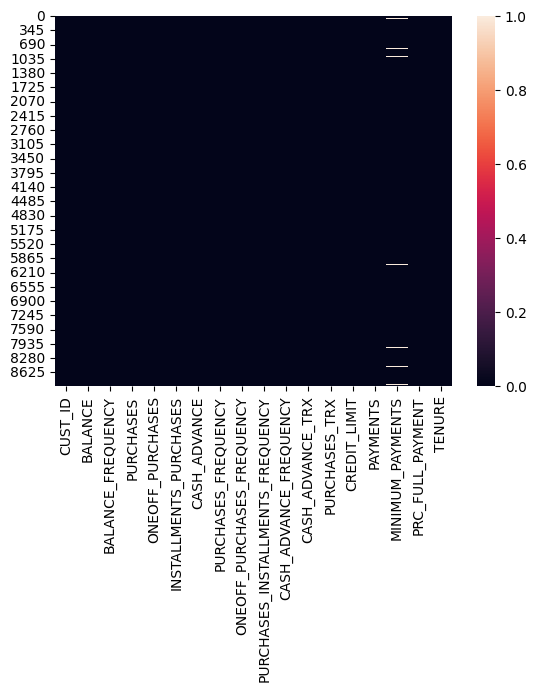

In [14]:
sns.heatmap(creditcard_df.isnull())

In [15]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [16]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
# Fazendo o tratamento dos valores nulos

In [18]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [19]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050827

In [20]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [21]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [22]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

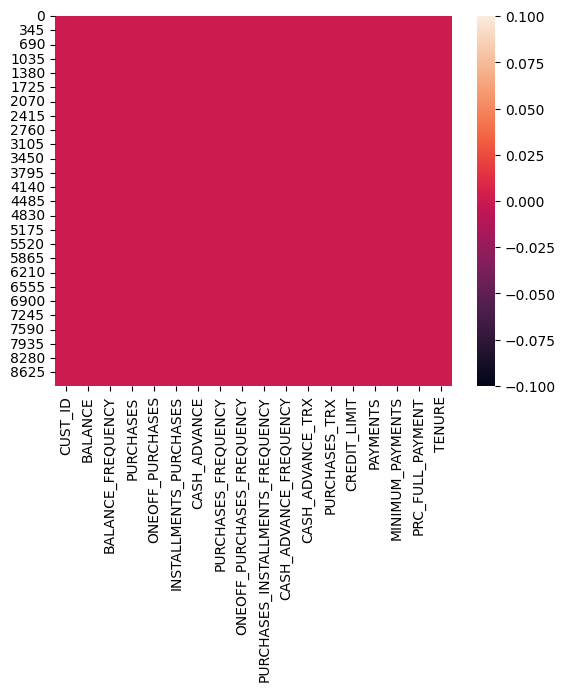

In [23]:
sns.heatmap(creditcard_df.isnull())

In [24]:
creditcard_df.duplicated().sum()

0

In [25]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True) 

In [26]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
# Geração de gráficos

In [28]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

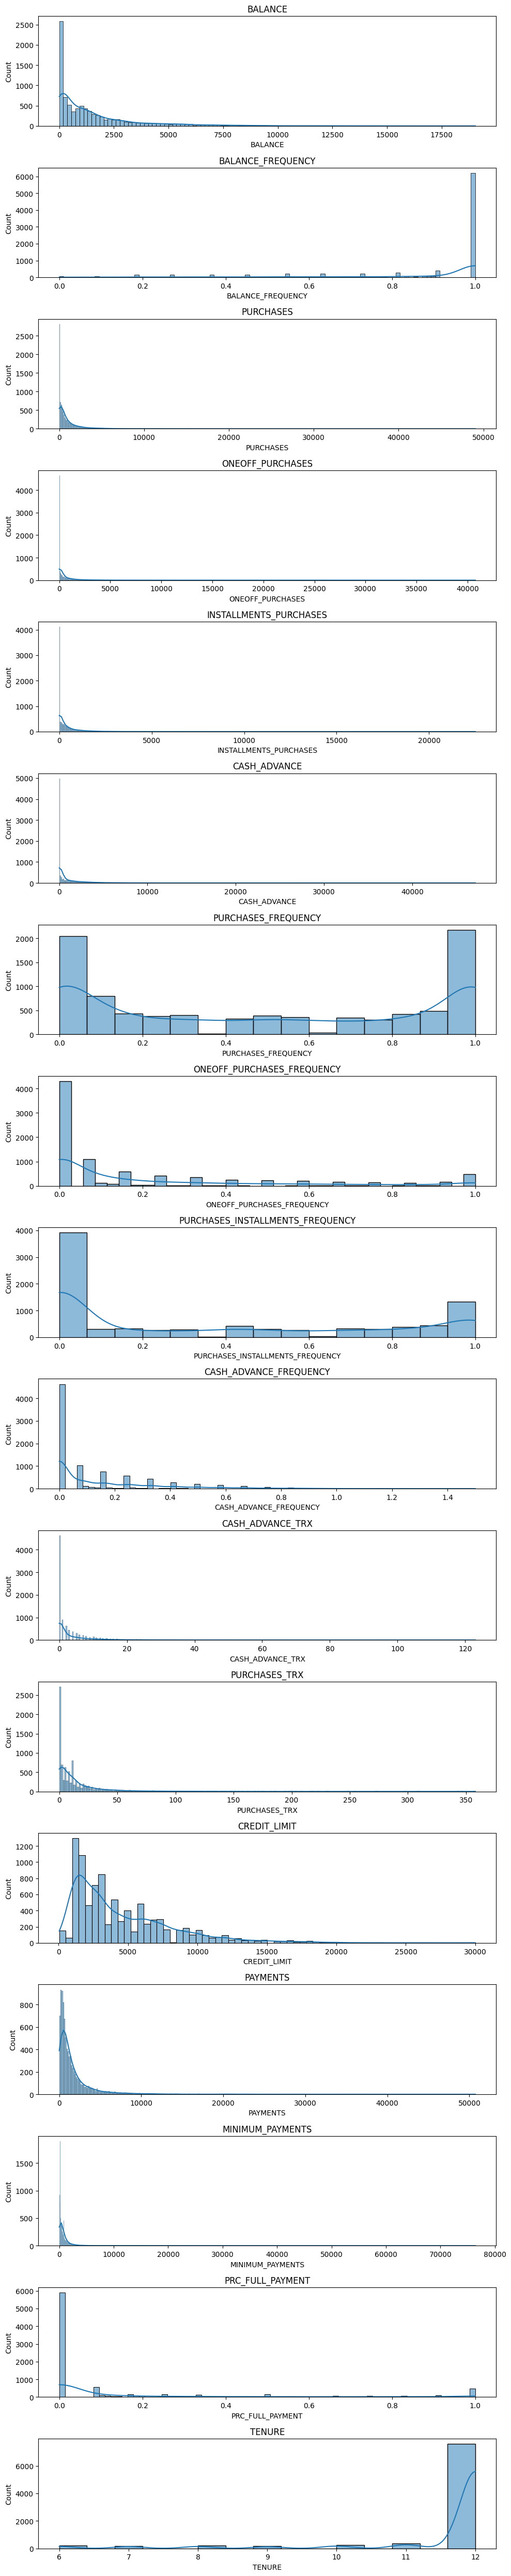

In [29]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde = True)
    plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [30]:
correlations = creditcard_df.corr()

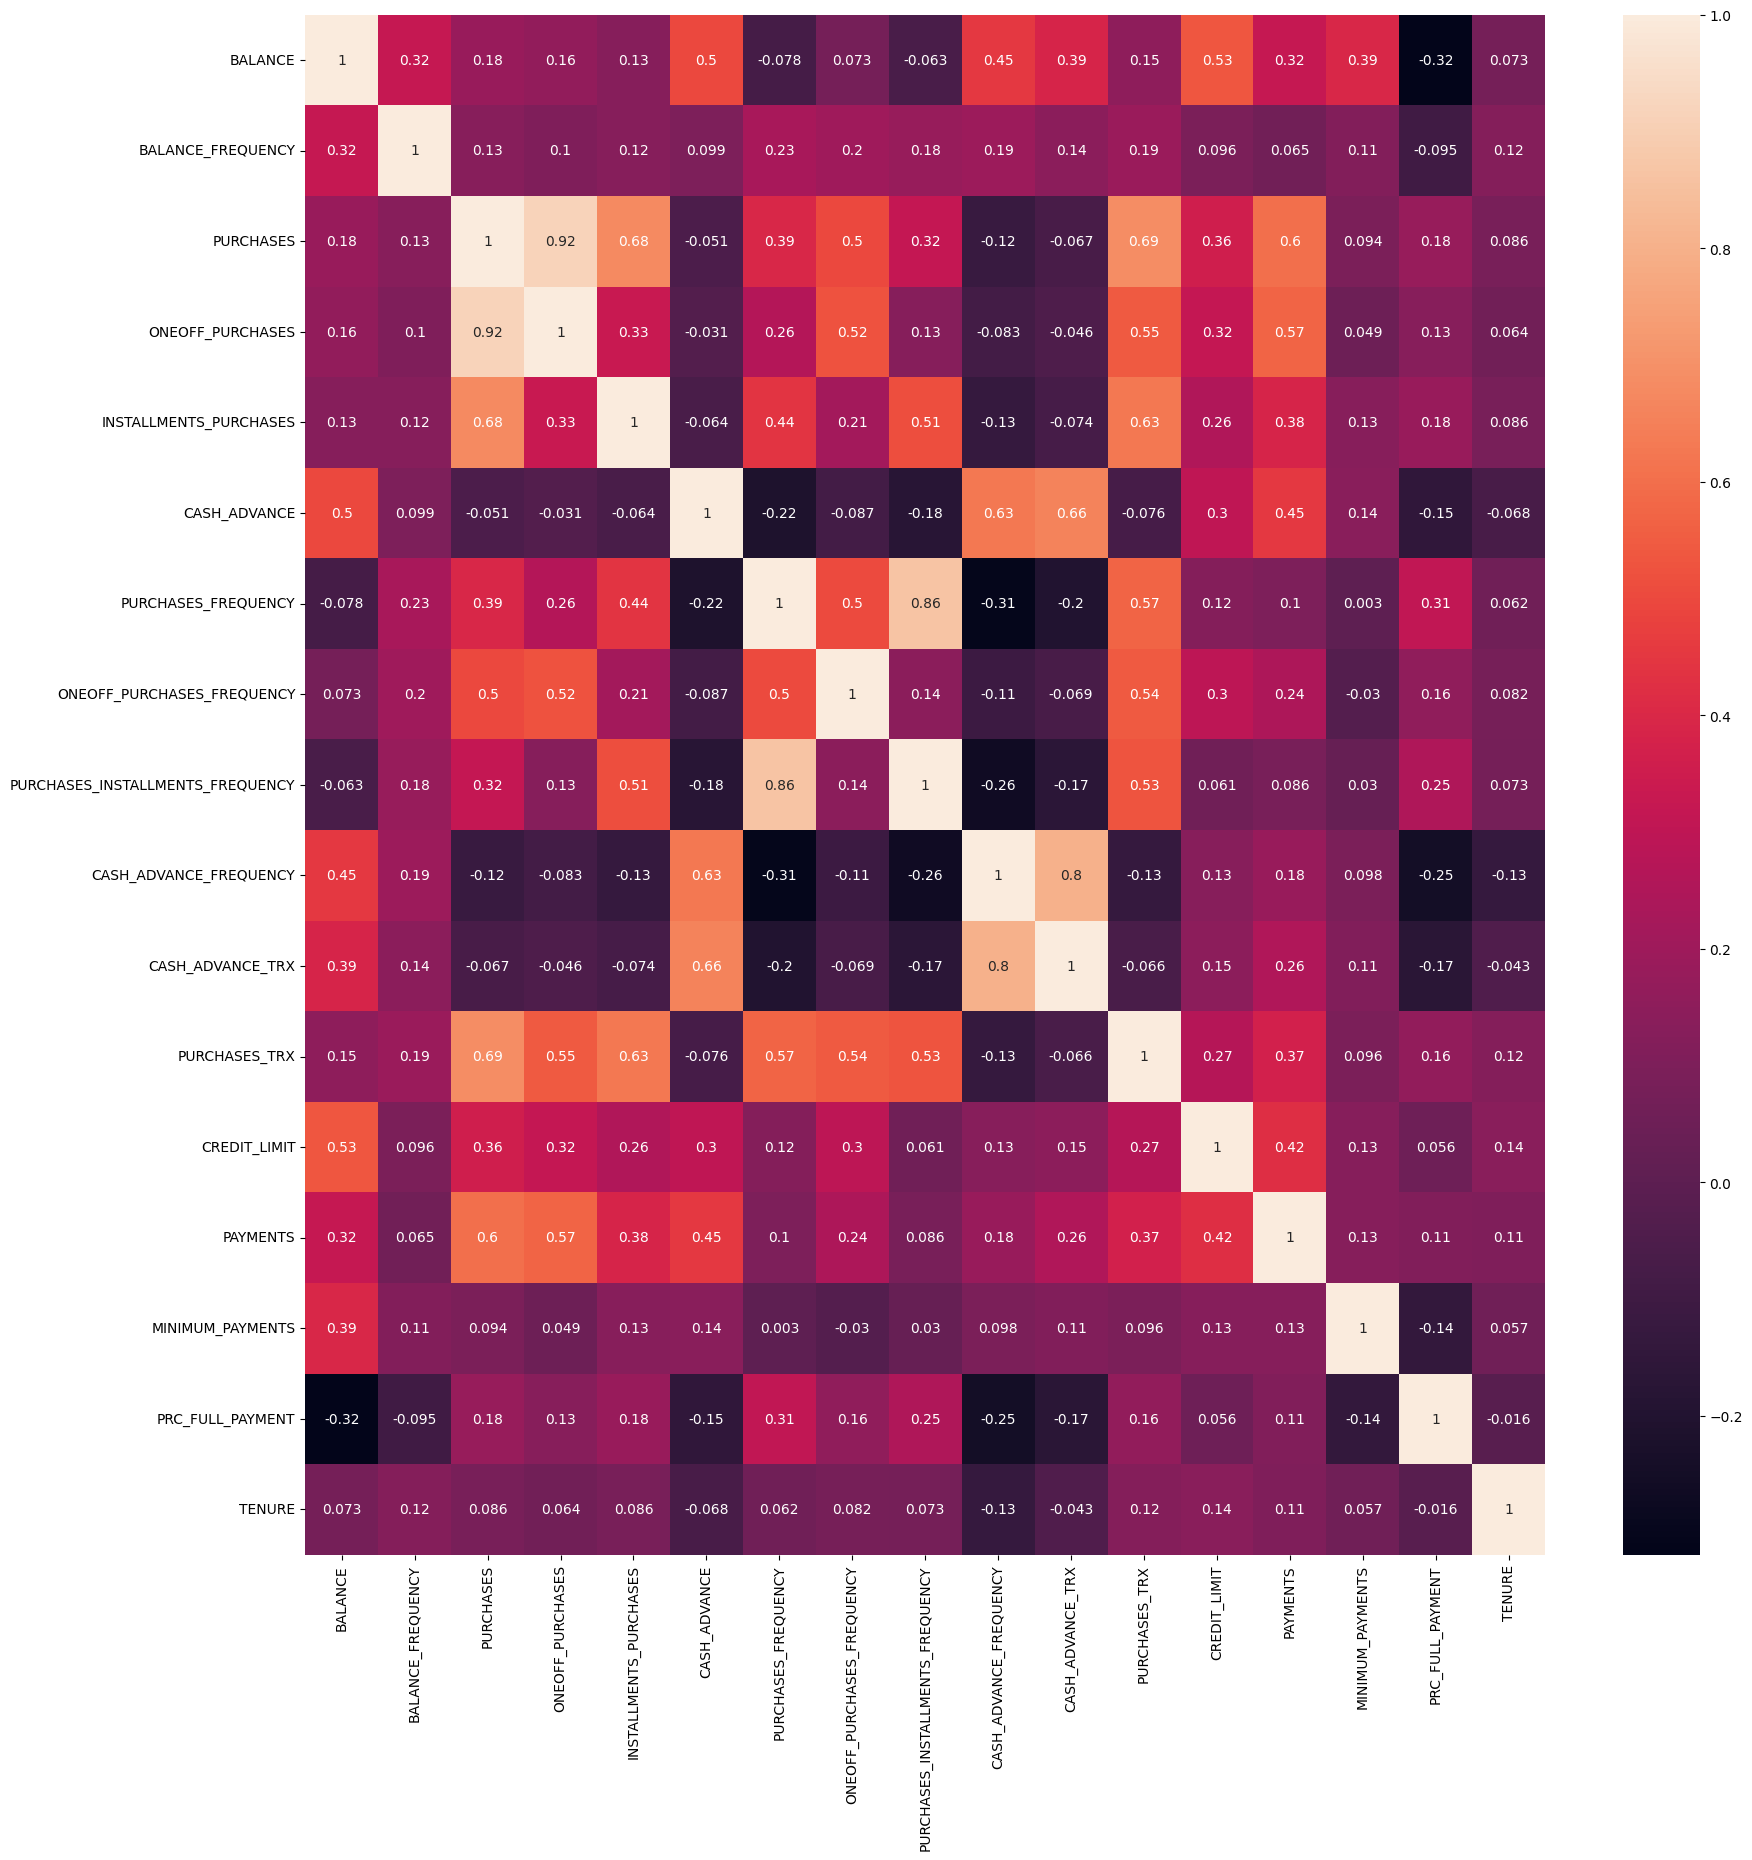

In [31]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

In [32]:
# Definição do número de clusters usando o Elbow Method

In [33]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [34]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [35]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [36]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

In [37]:
print(wcss_1)

[152150.0000000002, 127784.76807659265, 111986.70111696026, 99073.93826774828, 92138.4094921789, 84852.49779219565, 79879.28040839145, 74624.6940212041, 69954.01914038297, 66485.40286972726, 63619.11959870143, 61364.9821908501, 59151.33460360818, 57484.1181686139, 56247.59609049377, 54268.67043627678, 53011.69358947946, 52049.873518620385, 50820.515140376454]


Text(0, 0.5, 'WCSS')

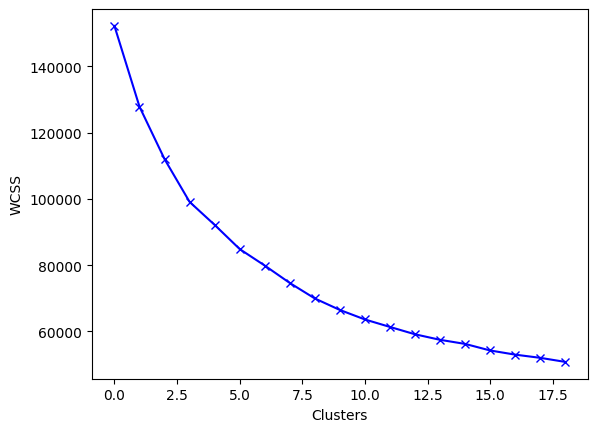

In [38]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [39]:
#  Agrupamento com k-means

In [40]:
kmeans = KMeans(n_clusters=8, n_init=1)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [41]:
labels, len(labels)

(array([7, 3, 6, ..., 2, 7, 0]), 8950)

In [42]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1297,   46, 2217, 1282,   31,  289, 1132, 2656], dtype=int64))

In [43]:
kmeans.cluster_centers_

array([[-6.97343676e-01, -2.13405295e+00, -3.13928885e-01,
        -2.32432432e-01, -3.15159710e-01, -3.12243978e-01,
        -5.53835722e-01, -4.16925167e-01, -4.60341082e-01,
        -4.83483932e-01, -3.66704538e-01, -4.24790949e-01,
        -2.07663401e-01, -2.25705525e-01, -2.55685350e-01,
         2.68658208e-01, -1.77426290e-01],
       [ 1.28480178e+00,  4.68028281e-01,  1.05492352e-01,
        -2.73112653e-01,  7.50200408e-01, -2.19490819e-02,
         9.05180209e-02, -5.42854076e-01,  3.34057366e-01,
        -2.51504804e-01, -7.46888267e-02,  2.89794642e-01,
        -1.84903717e-02, -3.55764500e-02,  1.03377618e+01,
        -5.25550971e-01,  2.95702050e-01],
       [-4.10937606e-01,  3.12784231e-01, -4.40804957e-02,
        -2.19295191e-01,  2.98626792e-01, -3.72631100e-01,
         1.00733215e+00, -2.71714766e-01,  1.15280557e+00,
        -4.77117809e-01, -3.67671575e-01,  1.58989025e-01,
        -3.09436860e-01, -2.41621549e-01, -1.28368758e-01,
         4.01301555e-01, -2.5

In [44]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.697344,-2.134053,-0.313929,-0.232432,-0.315160,-0.312244,-0.553836,-0.416925,-0.460341,-0.483484,-0.366705,-0.424791,-0.207663,-0.225706,-0.255685,0.268658,-0.177426
1,1.284802,0.468028,0.105492,-0.273113,0.750200,-0.021949,0.090518,-0.542854,0.334057,-0.251505,-0.074689,0.289795,-0.018490,-0.035576,10.337762,-0.525551,0.295702
2,-0.410938,0.312784,-0.044080,-0.219295,0.298627,-0.372631,1.007332,-0.271715,1.152806,-0.477118,-0.367672,0.158989,-0.309437,-0.241622,-0.128369,0.401302,-0.025917
3,0.921494,0.336770,-0.338185,-0.240830,-0.357220,0.924252,-0.738348,-0.358315,-0.643506,1.424554,0.978228,-0.430839,0.386610,0.068905,0.156732,-0.436258,-0.294101
4,1.876277,0.343535,11.043146,10.334427,7.122203,0.391031,1.054172,1.885885,1.001265,-0.272345,0.043896,5.278083,3.034577,8.005903,1.078468,1.084940,0.312470
5,2.043238,0.379275,-0.024497,-0.031224,-0.000899,3.456287,-0.185817,-0.017260,-0.134355,2.452938,3.201018,0.005270,1.381982,2.018093,0.566457,-0.287409,0.034893
6,0.262933,0.439809,1.260745,1.149385,0.869289,-0.279081,1.122689,1.877086,0.689068,-0.371322,-0.291994,1.512280,0.888230,0.607262,-0.010067,0.499166,0.289388
7,-0.140979,0.377694,-0.312030,-0.189512,-0.389498,-0.245239,-0.686083,-0.207232,-0.723485,-0.156145,-0.210615,-0.429051,-0.391829,-0.292998,-0.092900,-0.440632,0.114791


In [45]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,113.012830,0.371733,332.490933,206.647140,126.072629,324.080905,0.268070,0.078081,0.181486,0.038394,0.746338,4.151118,3738.885038,1079.748474,268.342620,2.322926e-01,11.279877
1,4238.681272,0.988142,1228.590870,139.126304,1089.464565,932.842862,0.526680,0.040514,0.497200,0.084816,2.739130,21.913043,4427.173913,1630.153515,24955.924375,8.326673e-17,11.913043
2,709.142887,0.951366,909.026175,228.452269,681.112147,197.446288,0.894642,0.121400,0.822592,0.039668,0.739738,18.661705,3368.591554,1033.673143,565.048566,2.710885e-01,11.482634
3,3482.486668,0.957048,280.668171,192.709097,88.038195,2917.071462,0.194016,0.095565,0.108692,0.420212,9.924514,4.000778,5901.093031,1932.617541,1229.463546,2.611668e-02,11.123735
4,5469.786878,0.958651,24597.057419,17745.470323,6851.587097,1798.881876,0.913441,0.765054,0.762366,0.080645,3.548387,145.903226,15535.483871,24909.448552,3377.529692,4.710411e-01,11.935484
5,5817.302485,0.967117,950.867197,540.612561,410.254637,8226.866758,0.415773,0.197309,0.311041,0.626002,25.093426,14.840830,9522.664360,7575.325703,2184.310980,6.965249e-02,11.564014
6,2111.747822,0.981457,3696.805512,2500.180468,1197.155080,393.625161,0.940940,0.762429,0.638291,0.060839,1.256184,52.299470,7726.192580,3491.107127,840.745860,2.997120e-01,11.904594
7,1271.038535,0.966743,336.548990,277.886374,58.849152,464.592532,0.214992,0.140636,0.076906,0.103898,1.811534,4.045232,3068.815178,884.943251,647.707772,2.483743e-02,11.670939


In [46]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


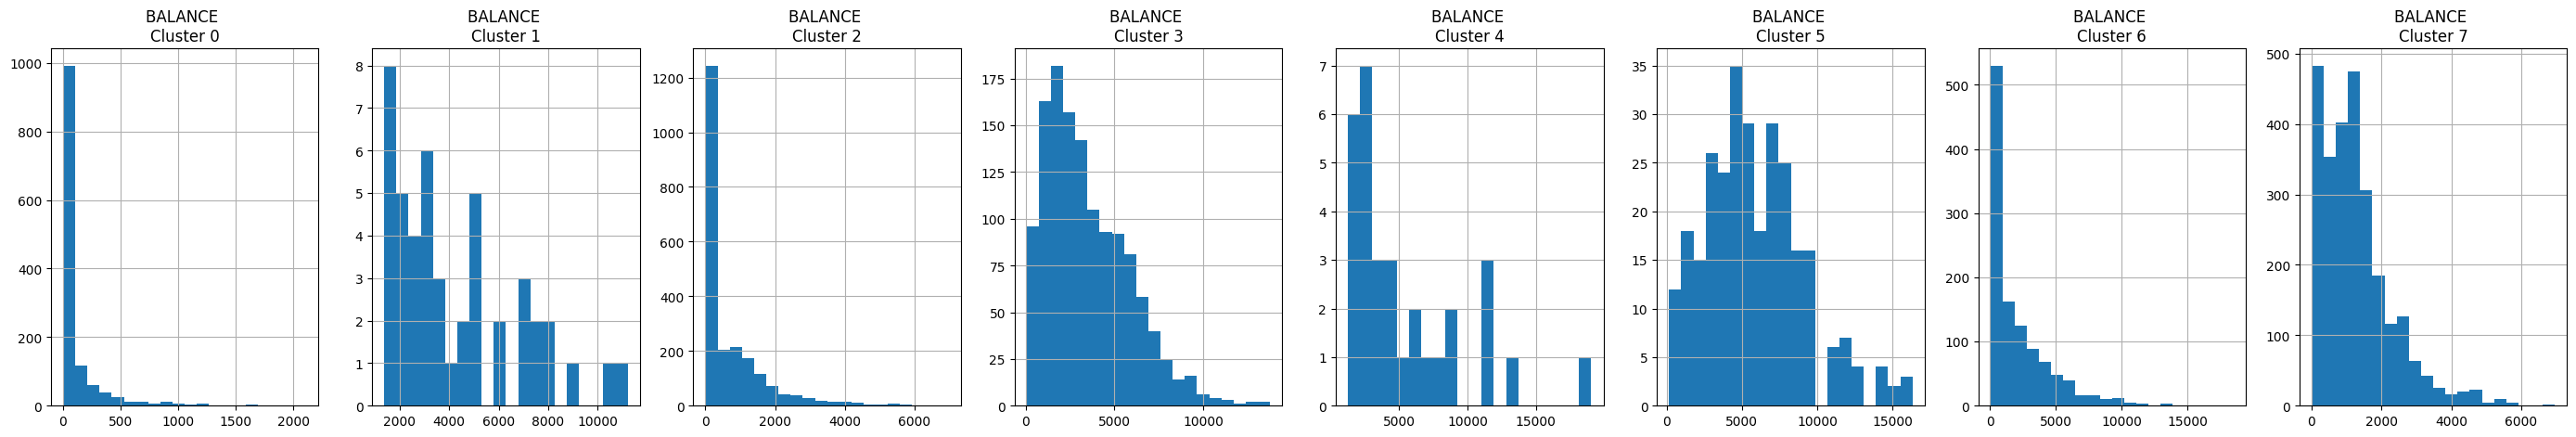

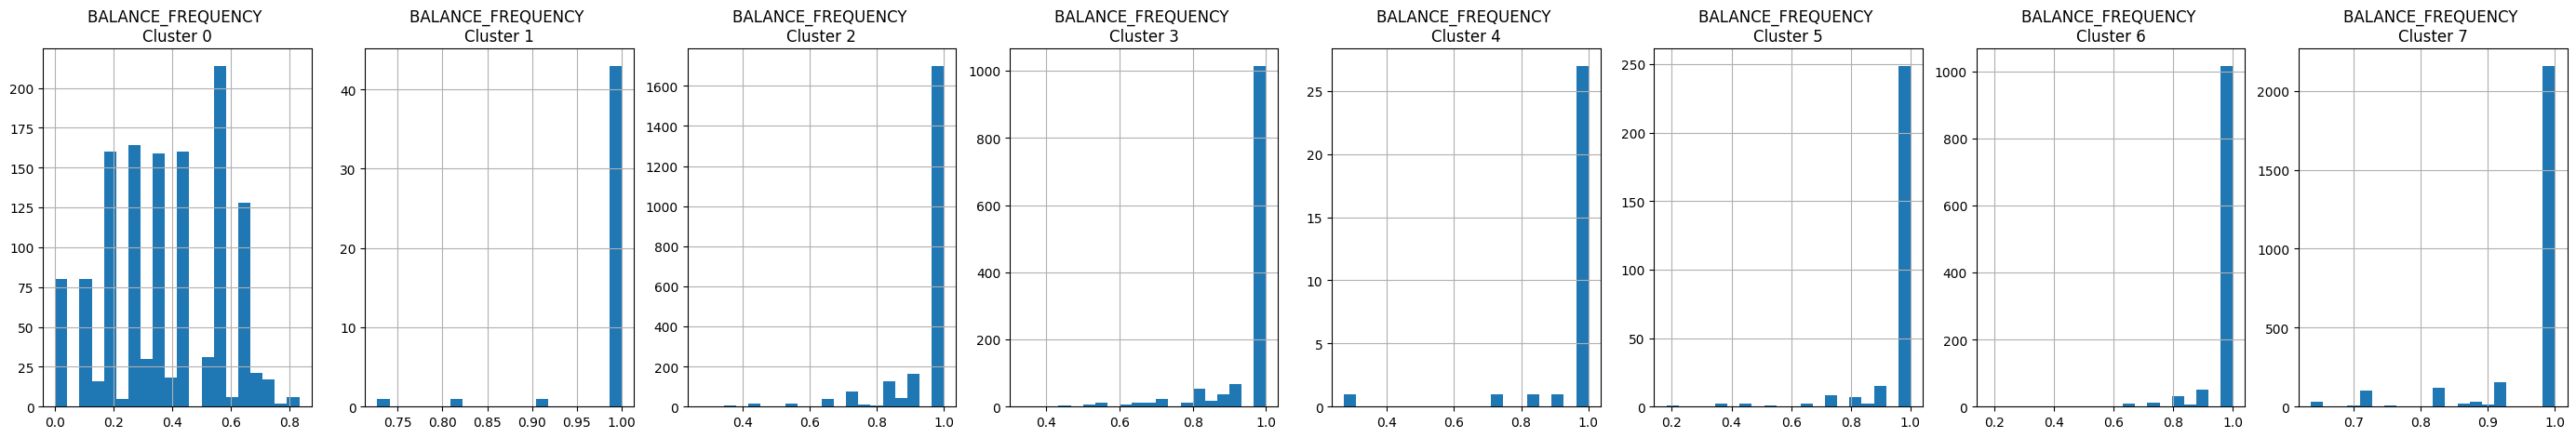

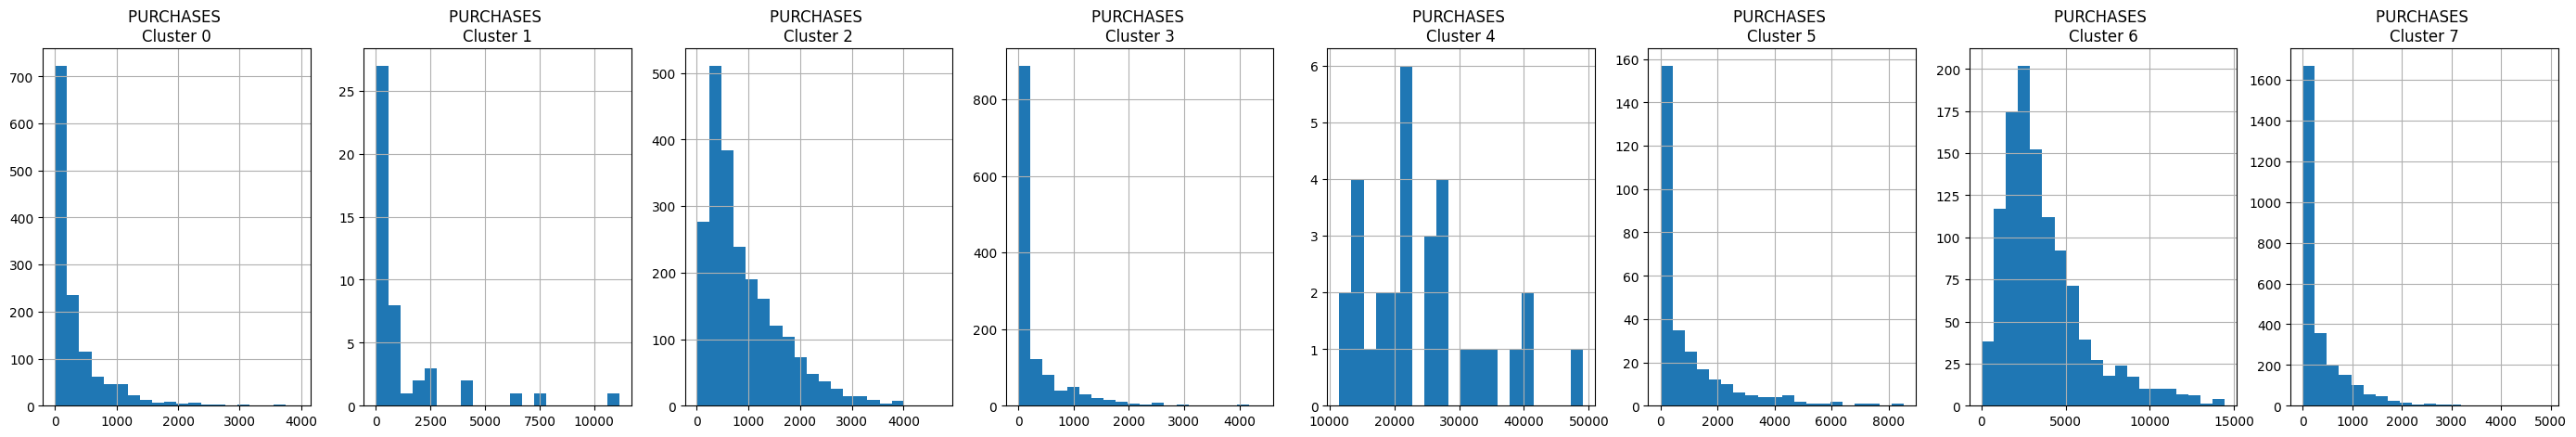

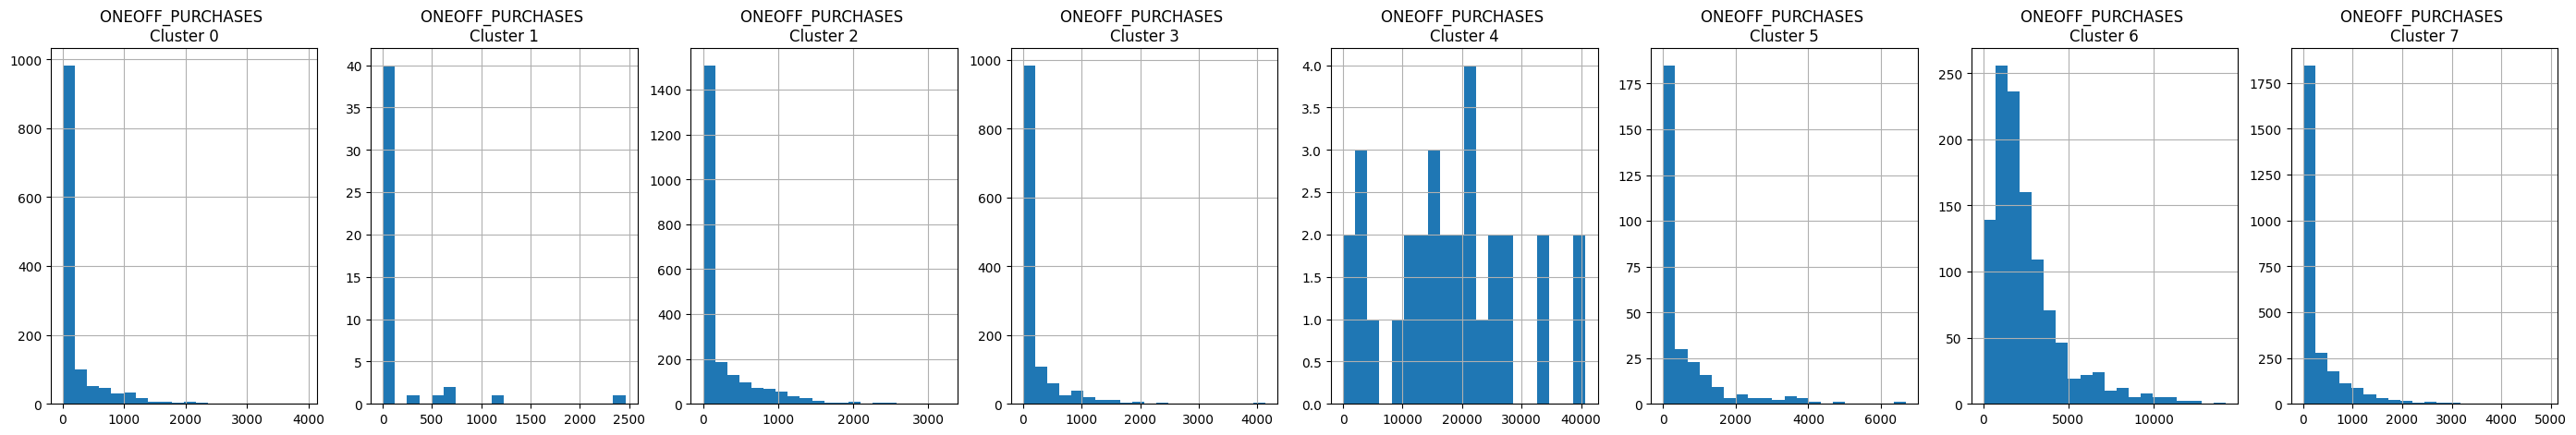

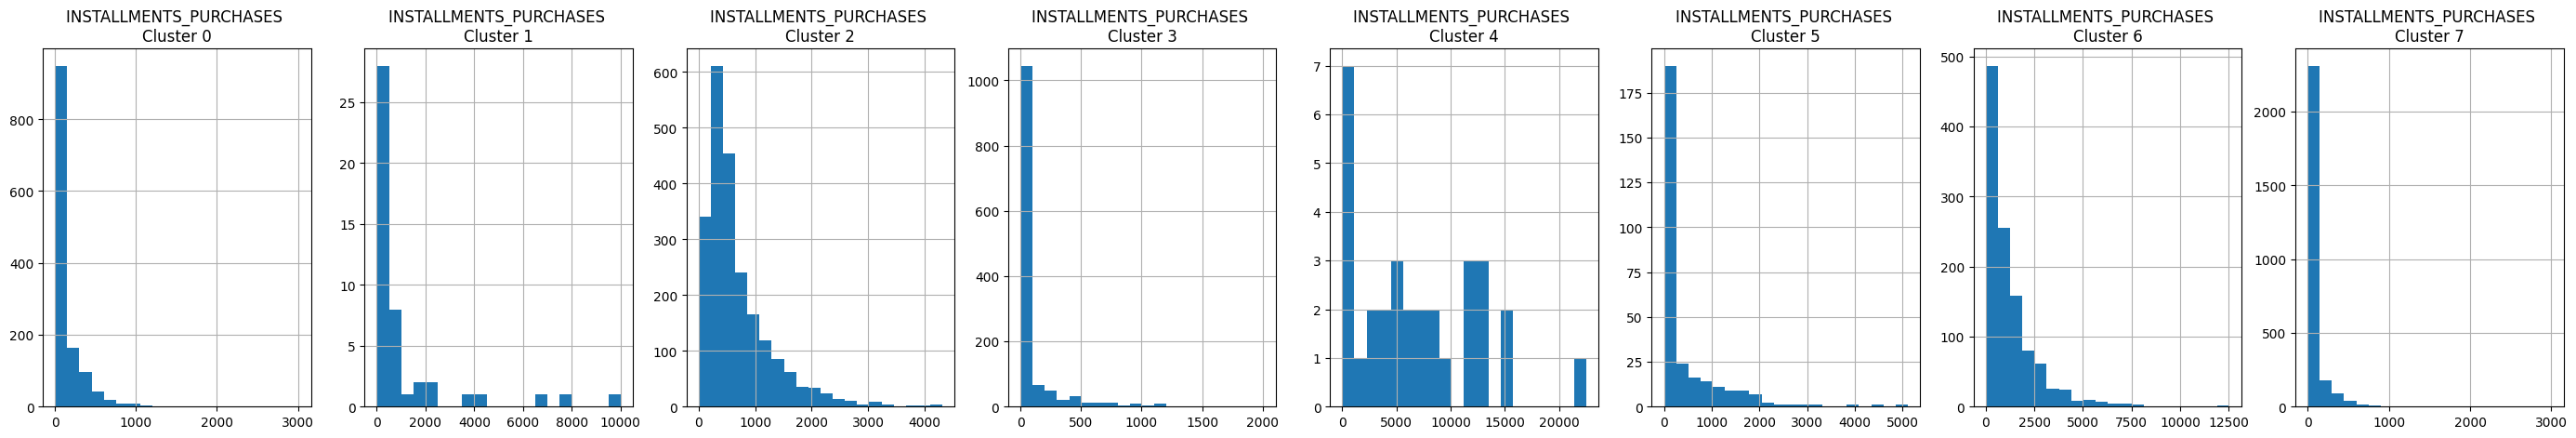

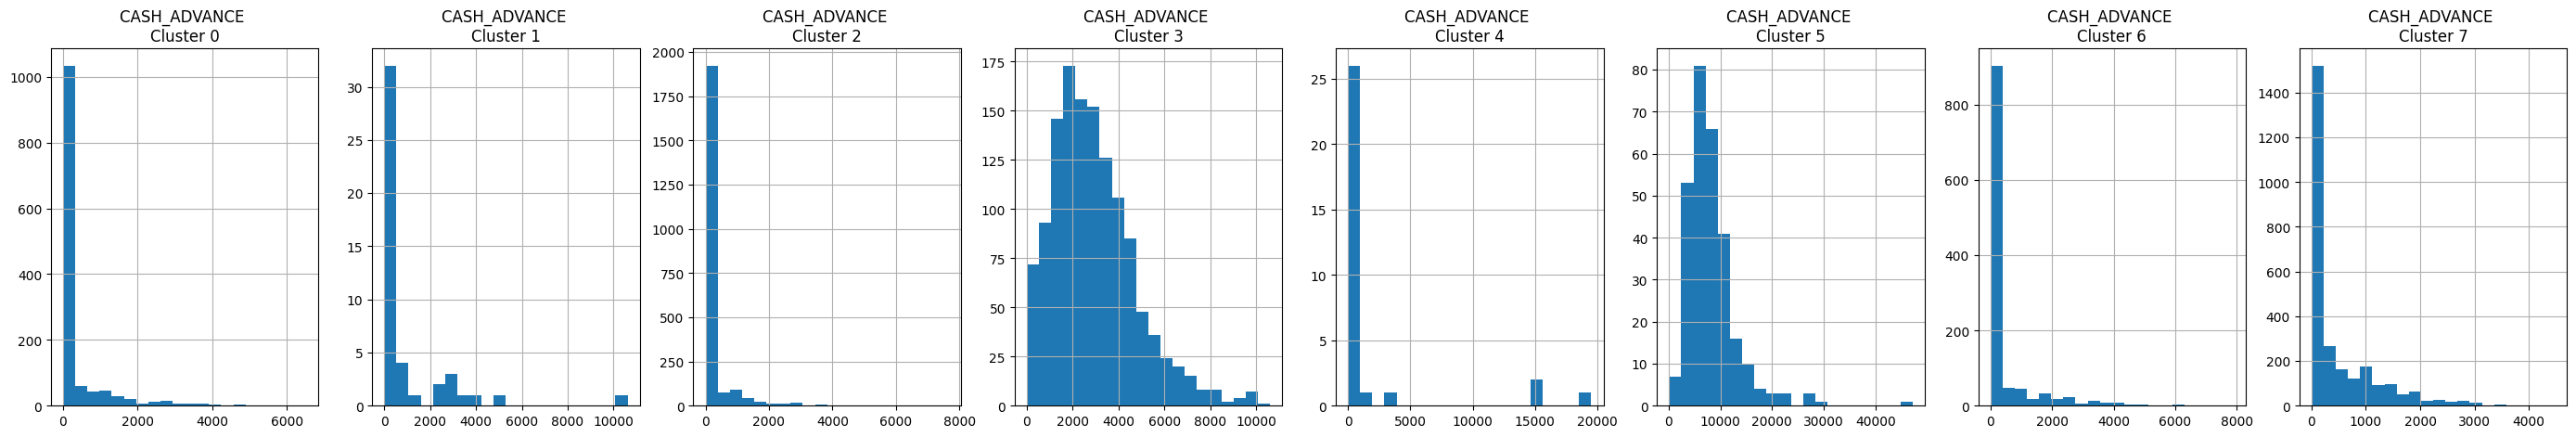

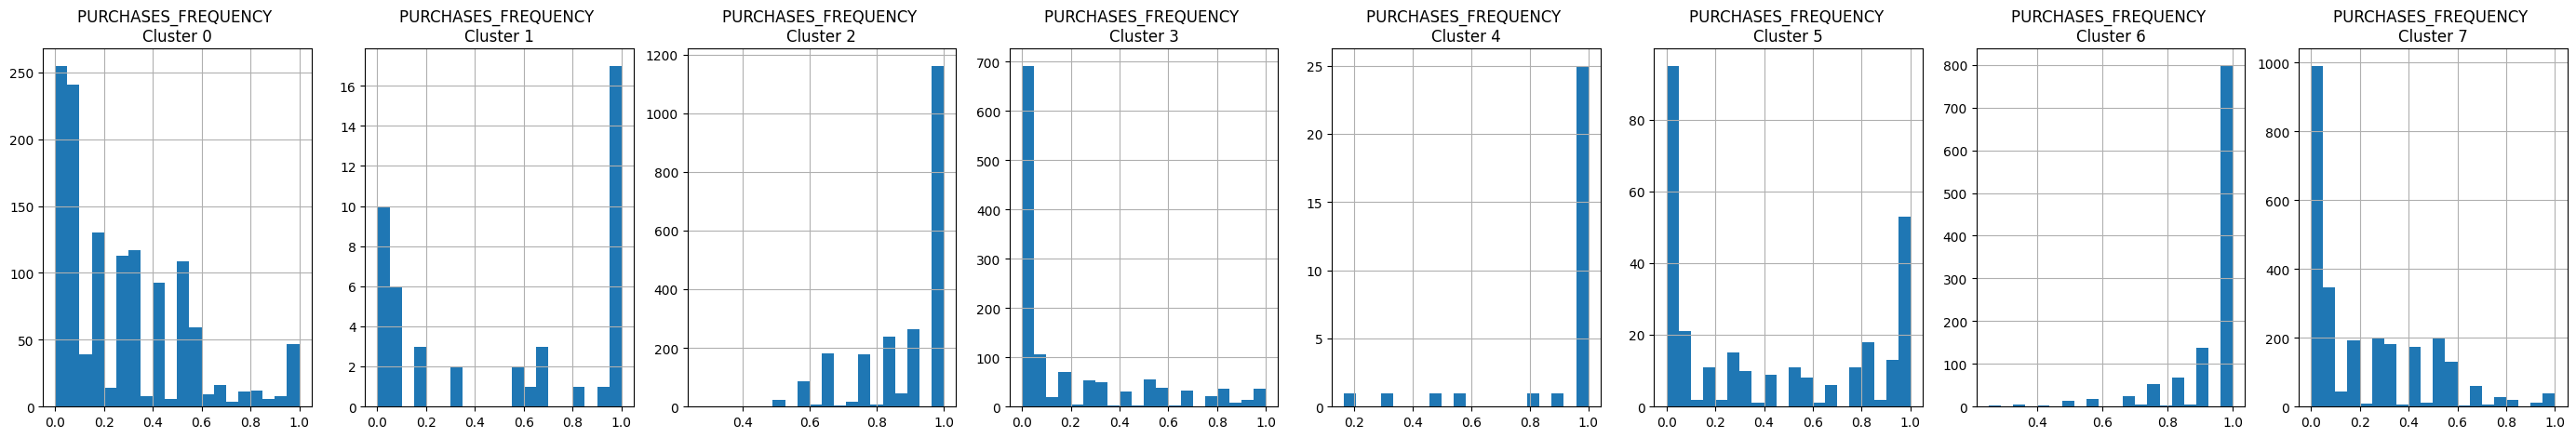

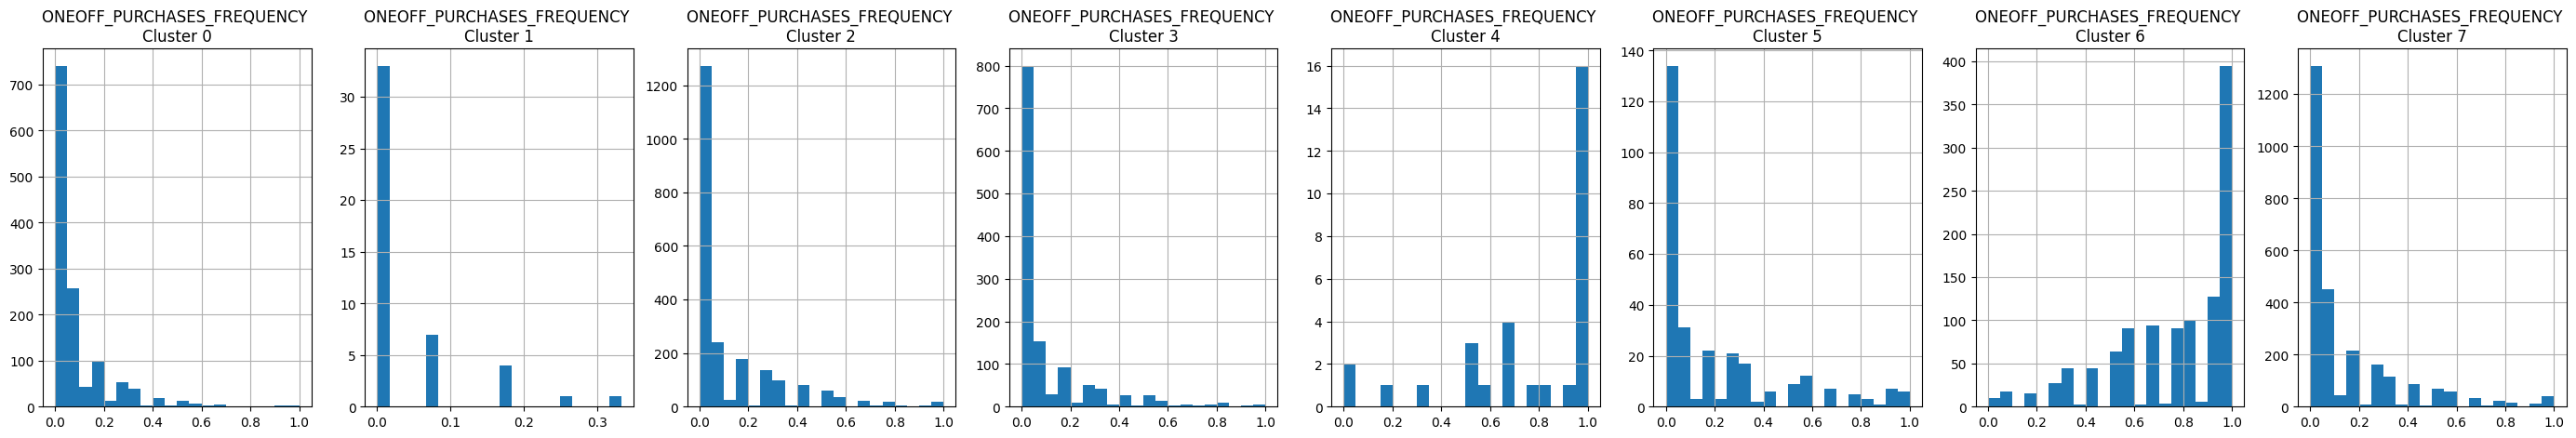

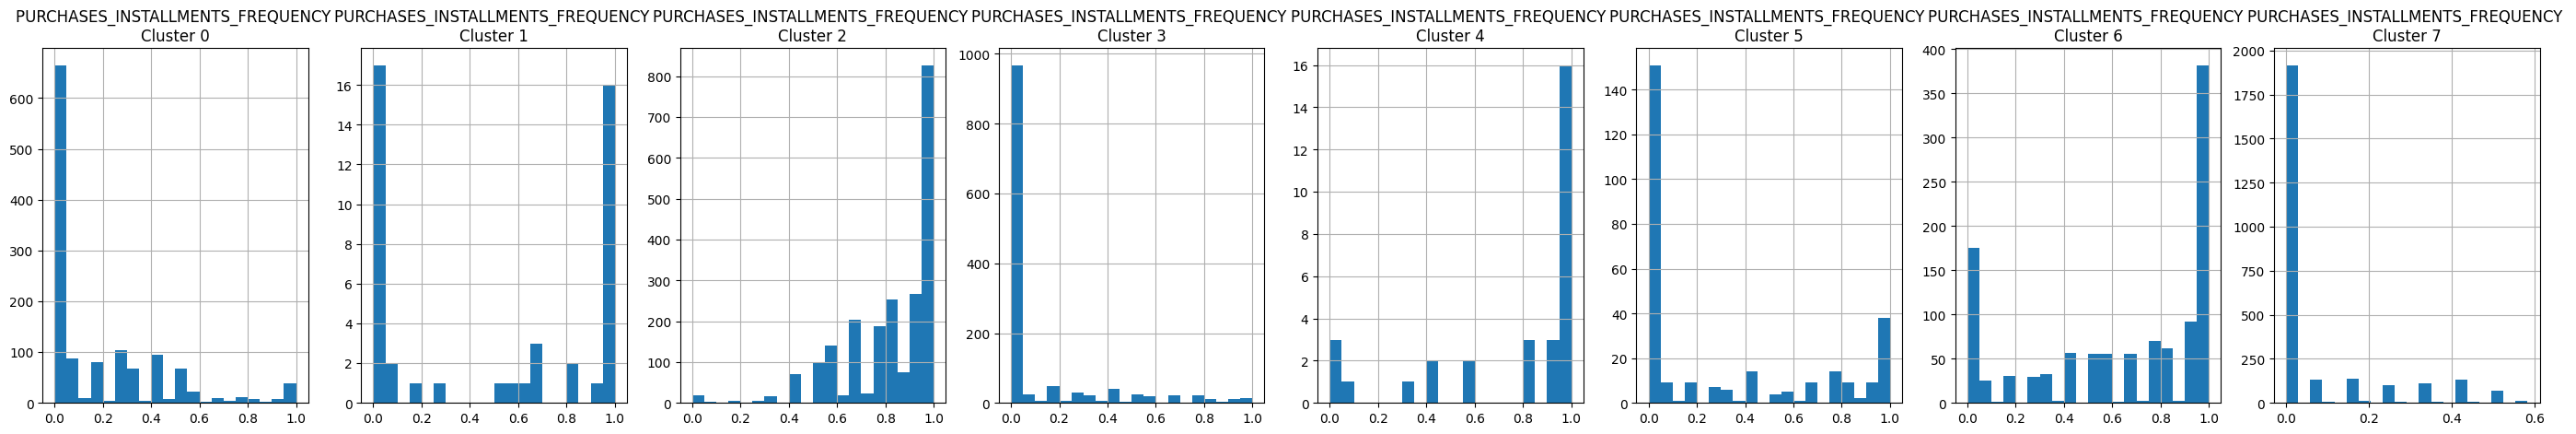

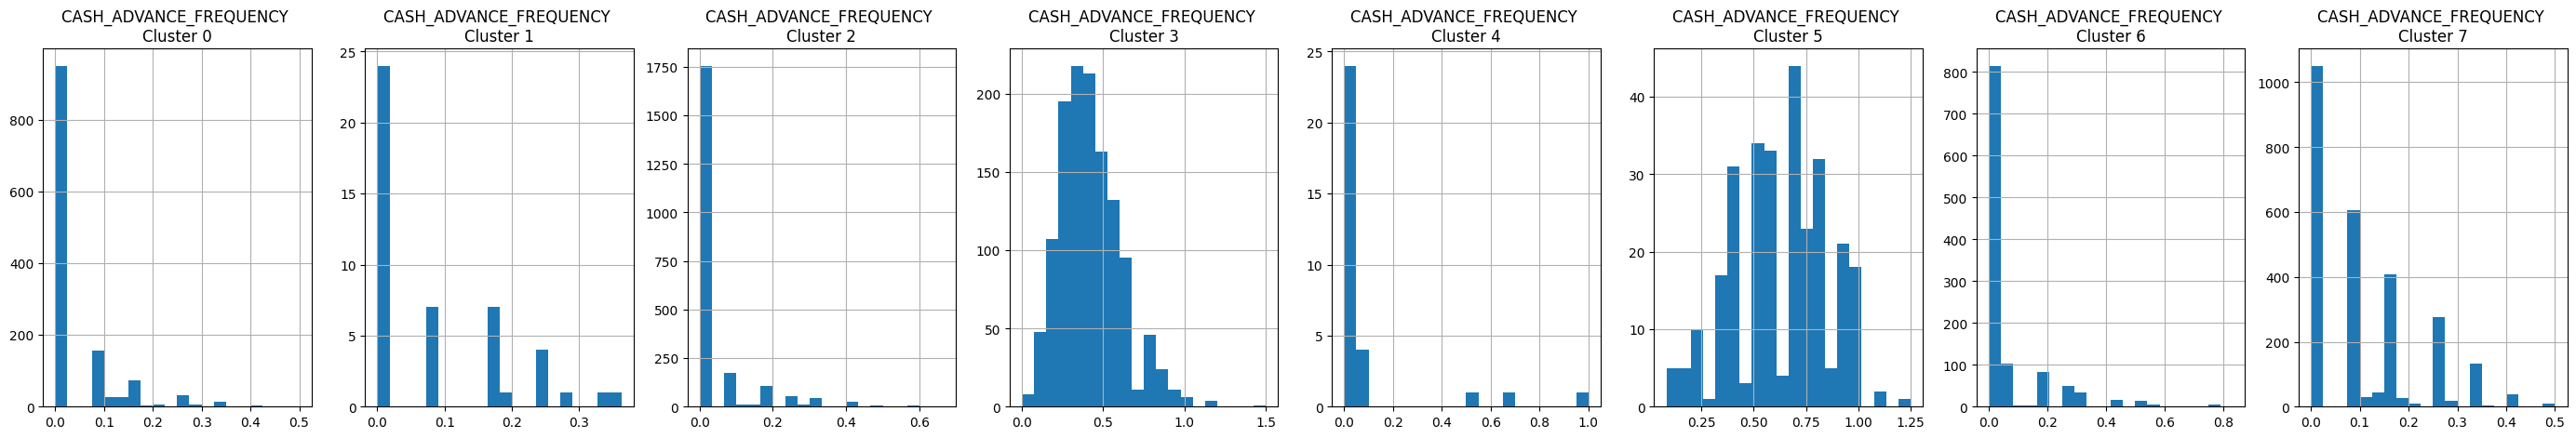

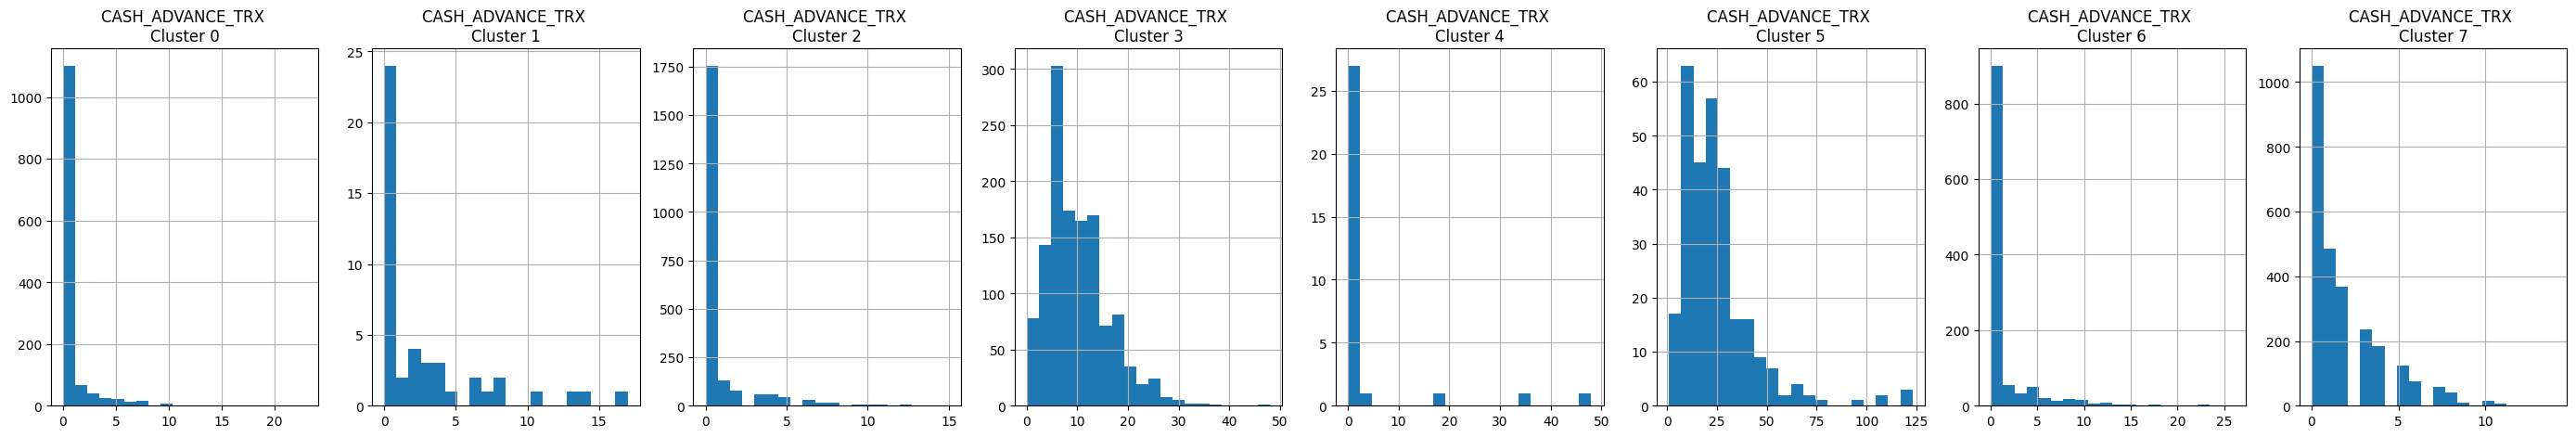

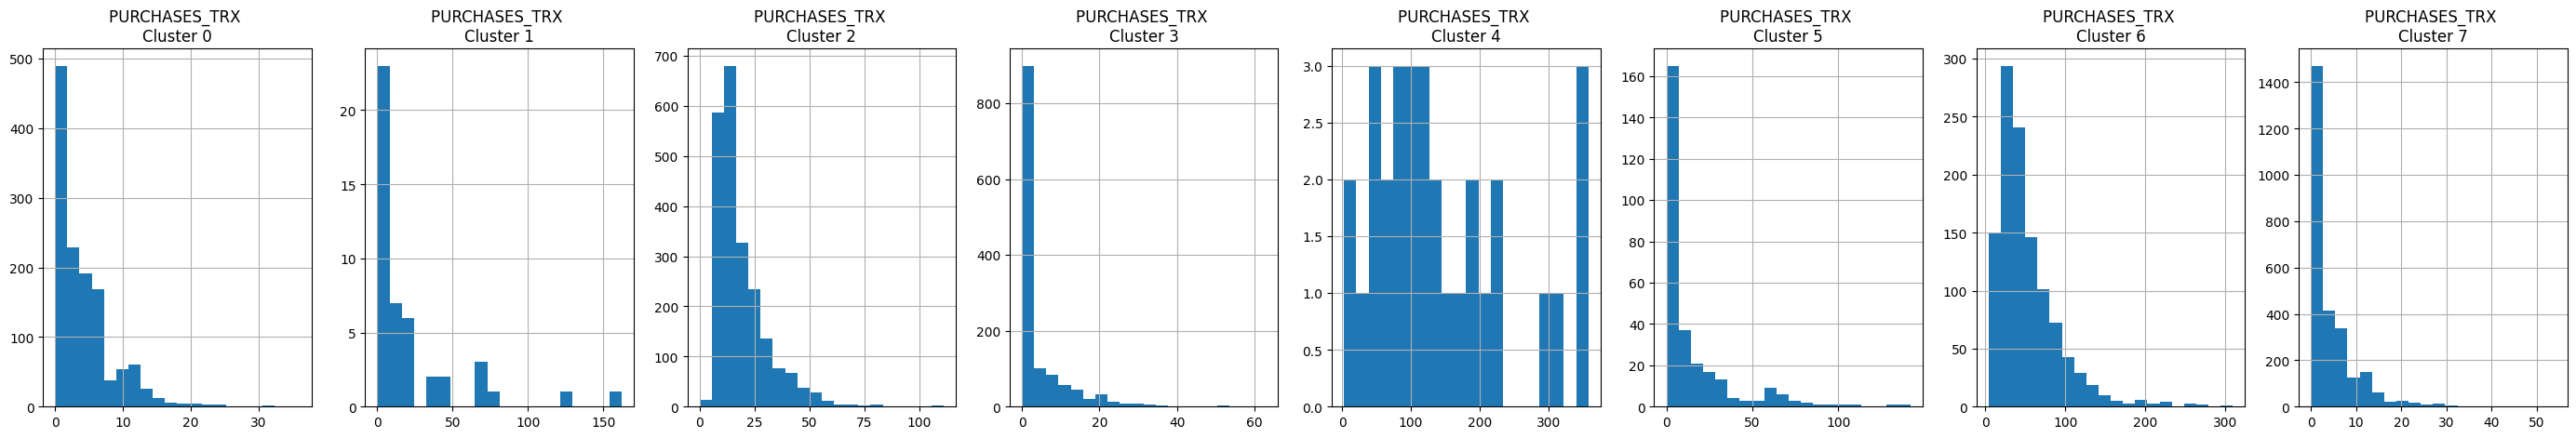

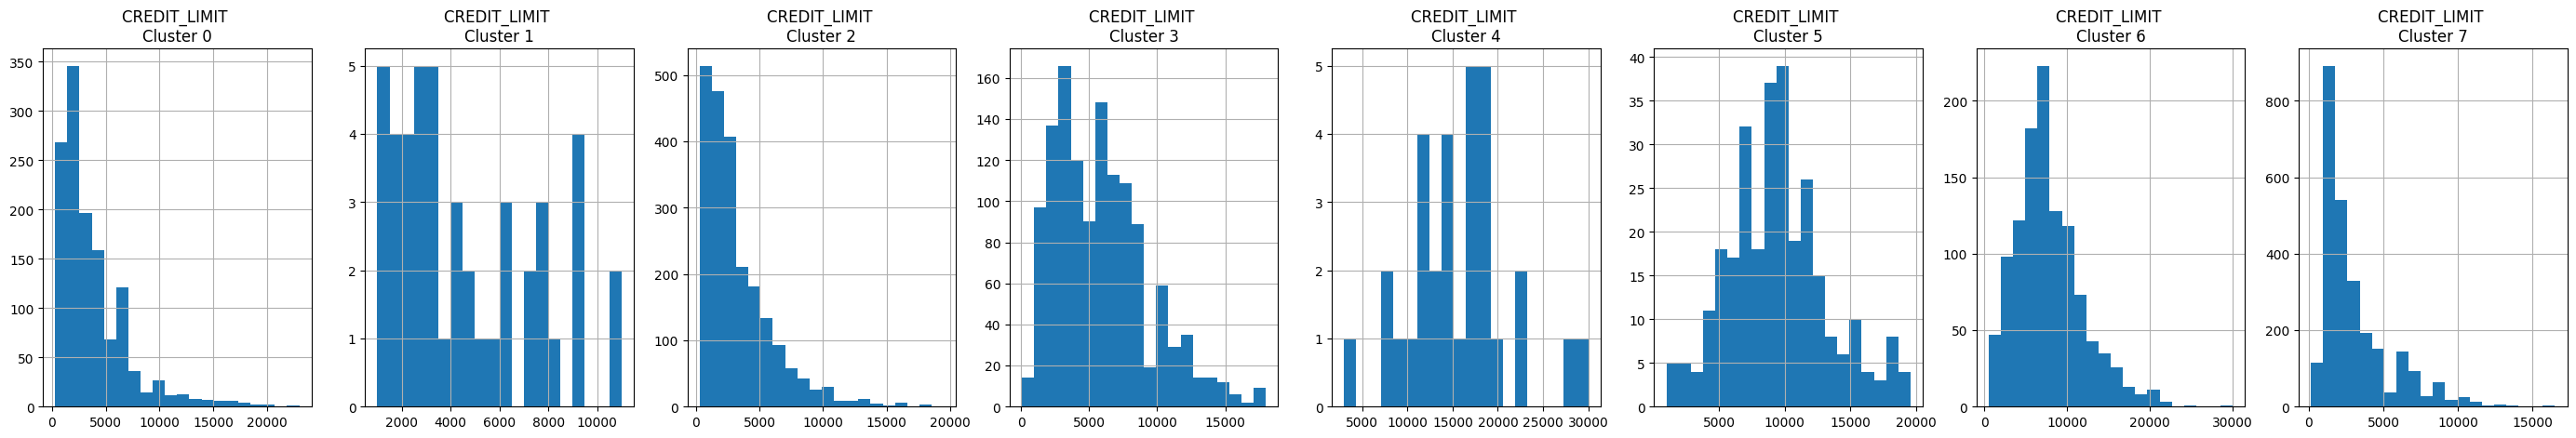

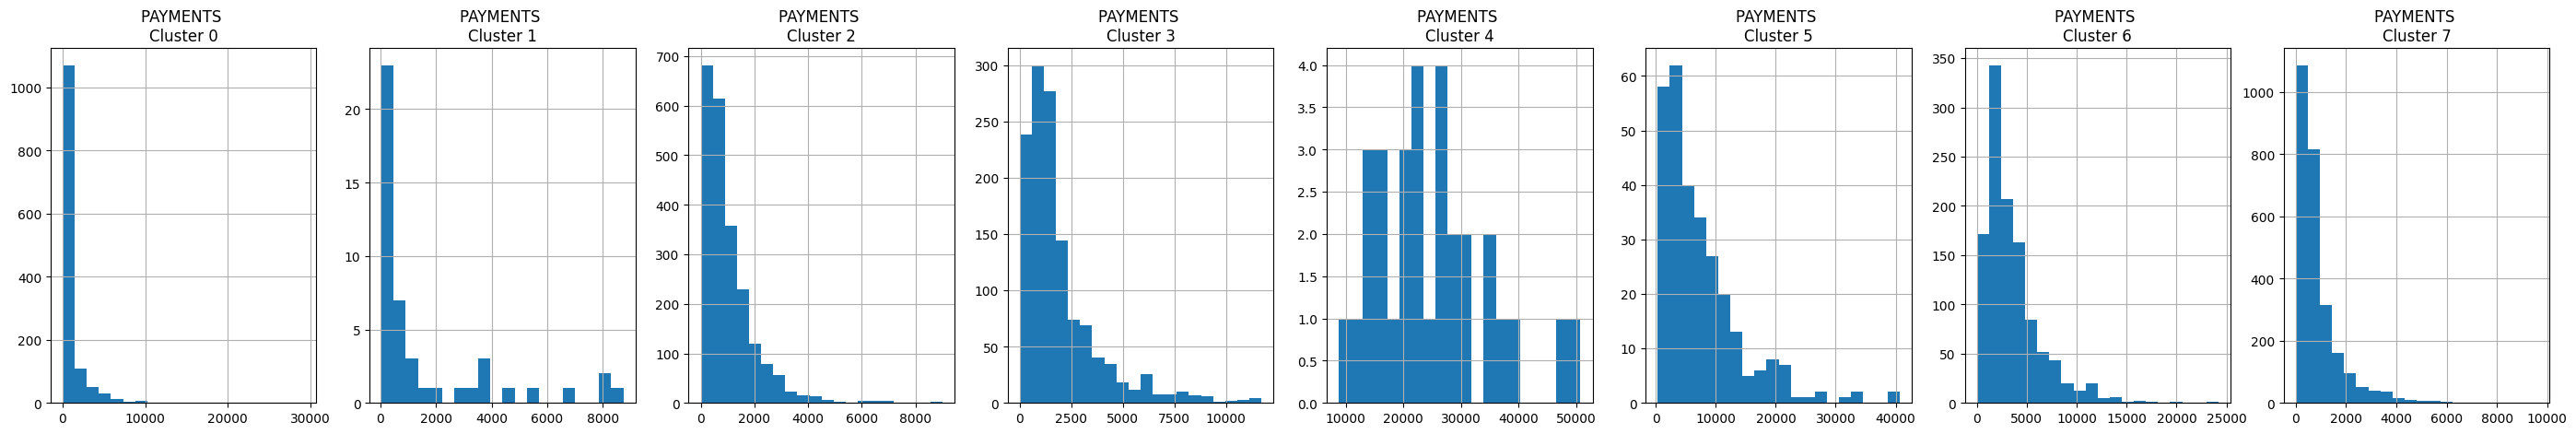

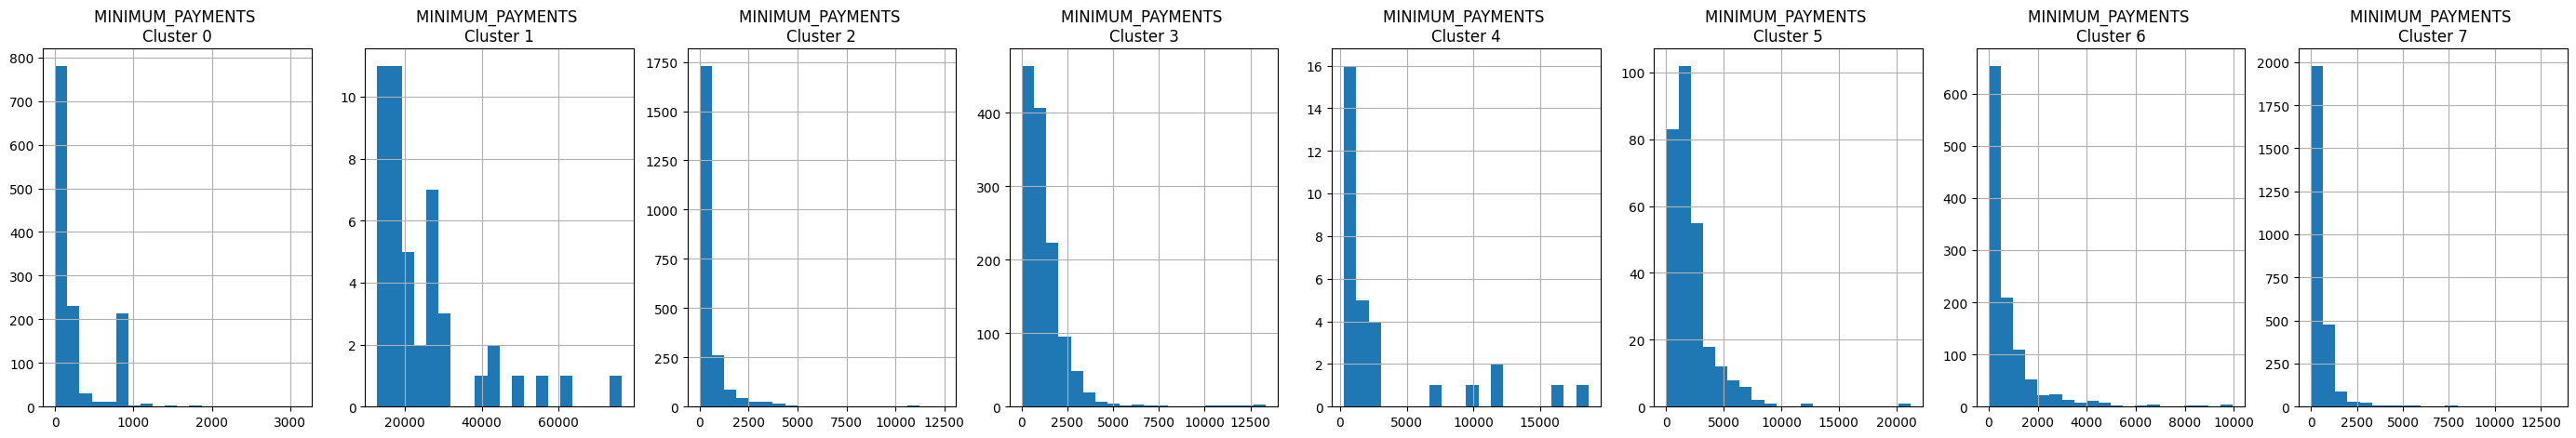

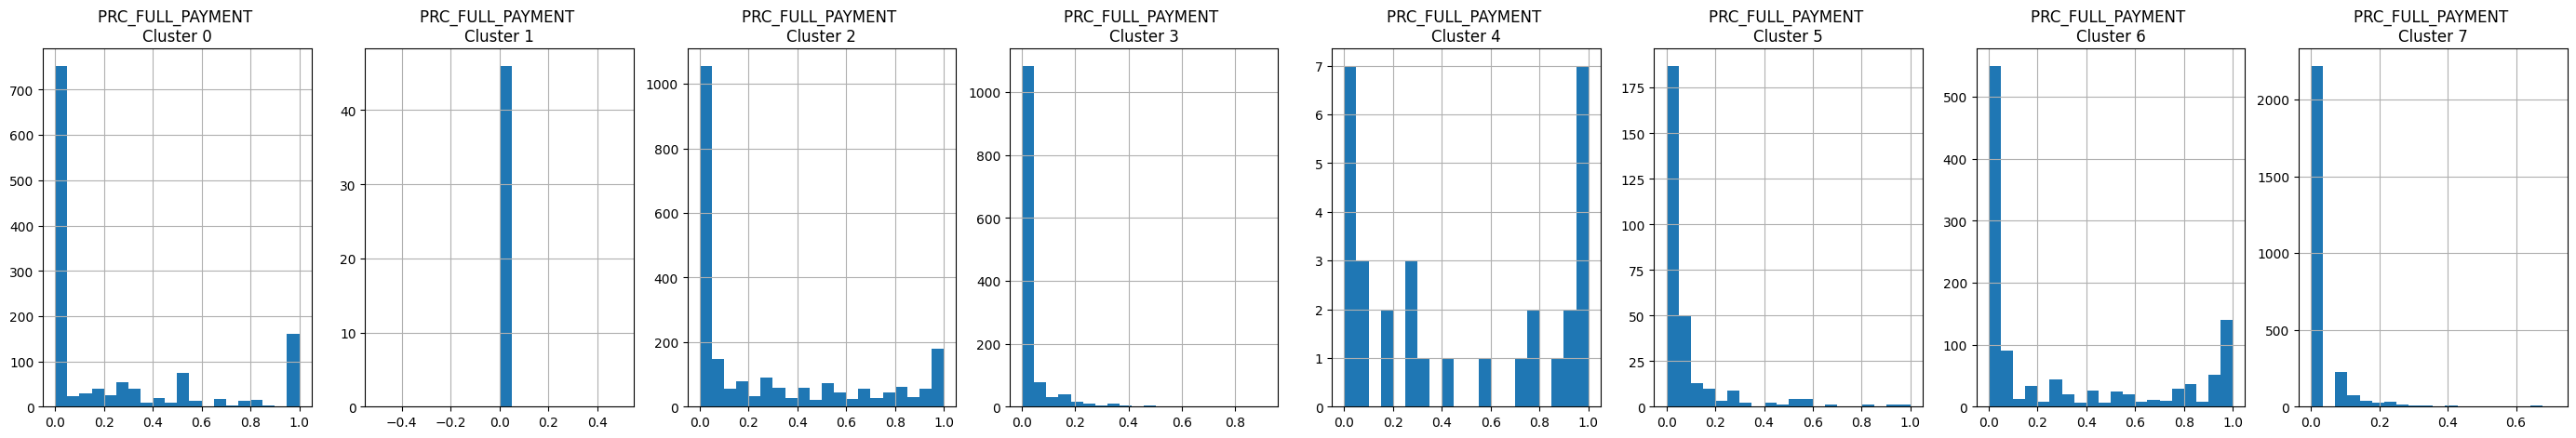

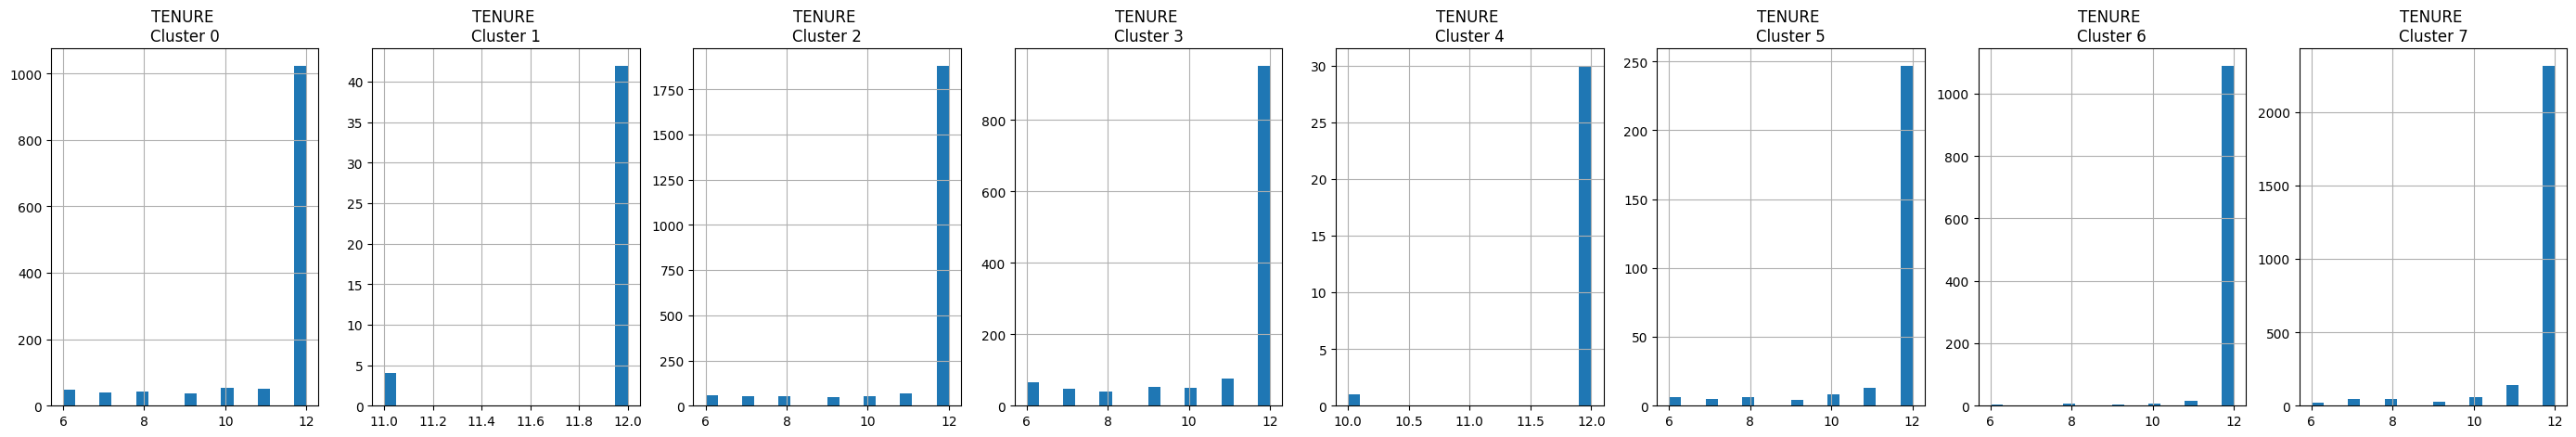

In [47]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [48]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
6991,10.805893,0.166667,76.51,50.93,25.58,0.000000,0.166667,0.166667,0.166667,0.000000,0,2,2500.0,0.000000,864.206542,0.000000,6,0
6996,29.602980,0.545455,144.94,0.00,144.94,0.000000,0.333333,0.000000,0.250000,0.000000,0,7,5000.0,249.685121,88.988794,0.181818,12,0
6999,72.025683,0.545455,891.28,0.00,891.28,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,10000.0,7220.399443,139.163940,0.833333,12,0
1982,216.685655,0.545455,921.18,469.78,451.40,0.000000,0.250000,0.166667,0.166667,0.000000,0,9,4500.0,892.146005,69.378949,0.000000,12,0


In [49]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6221,1049.109012,1.000000,200.02,0.0,200.02,0.0,0.500000,0.000000,0.500000,0.0,0,6,1000.0,548.458069,992.622332,0.000000,12,7
2644,1327.653853,1.000000,20.90,20.9,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1500.0,287.690115,483.248100,0.000000,12,7
6224,131.271213,1.000000,147.26,0.0,147.26,0.0,0.333333,0.000000,0.250000,0.0,0,4,1000.0,430.455738,163.227325,0.090909,12,7
6207,344.288226,1.000000,146.75,0.0,146.75,0.0,0.416667,0.000000,0.416667,0.0,0,5,1500.0,135.874190,203.496004,0.000000,12,7
0,40.900749,0.818182,95.40,0.0,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.000000,12,7


In [50]:
# Salvando o resultado em CSV

In [51]:
credit_ordered.to_csv('cluster.csv') 

In [52]:
# Aplicação de PCA (Principal Component Analysis) e vizualização dos resultados

In [53]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221525, -1.07644994],
       [-1.13825917,  2.506472  ],
       [ 0.96965923, -0.38350626],
       ...,
       [-0.92620785, -1.81078653],
       [-2.33654449, -0.65797718],
       [-0.55642443, -0.40047515]])

In [54]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682215,-1.076450
1,-1.138259,2.506472
2,0.969659,-0.383506
3,-0.873640,0.043184
4,-1.599425,-0.688586


In [55]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682215,-1.076450,7
1,-1.138259,2.506472,3
2,0.969659,-0.383506,6
3,-0.873640,0.043184,7
4,-1.599425,-0.688586,7


<Axes: xlabel='pca1', ylabel='pca2'>

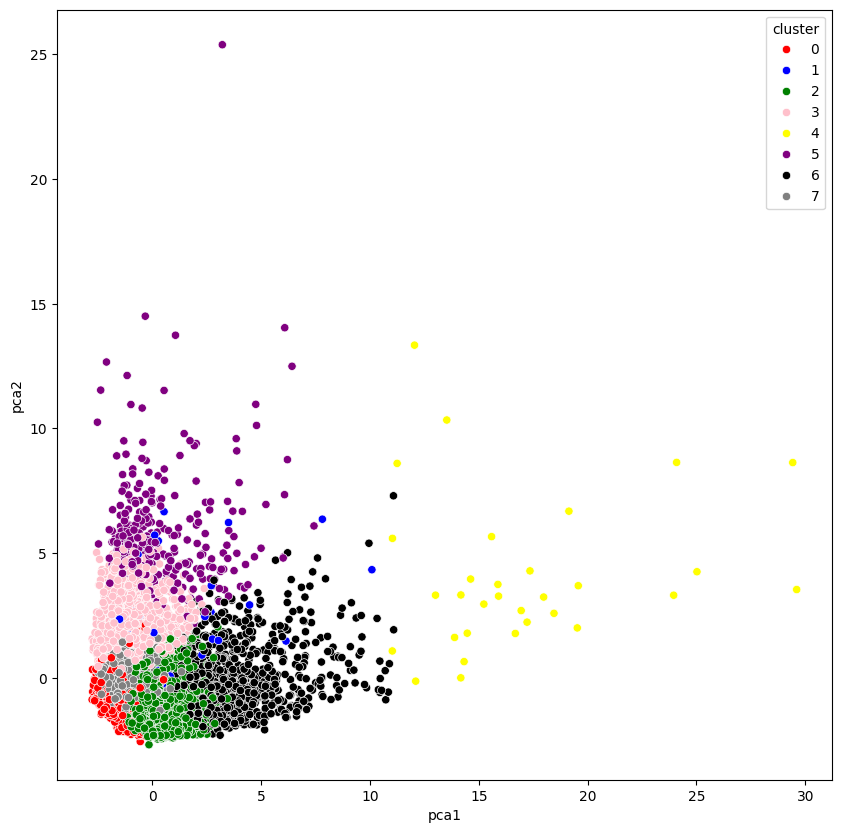

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette= ['red', 'blue', 'green', 'pink', 'yellow', 'purple', 'black', 'gray'])

In [57]:
# Aplicação dos autoencoders

In [58]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [59]:
creditcard_df_scaled.shape

(8950, 17)

In [60]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17

In [61]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [62]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [63]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [64]:
# encoder
encoder = Model(input_df, encoded)

In [65]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [66]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50

280/280 [==============================] - 8s 24ms/step - loss: 0.2443
Epoch 2/50
280/280 [==============================] - 6s 22ms/step - loss: 0.1127
Epoch 3/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0742
Epoch 4/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0715
Epoch 5/50
280/280 [==============================] - 6s 23ms/step - loss: 0.0677
Epoch 6/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0520
Epoch 7/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0552
Epoch 8/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0509
Epoch 9/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0437
Epoch 10/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0770
Epoch 11/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0571
Epoch 12/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0472
Epoch 13/50


In [67]:
creditcard_df_scaled.shape

(8950, 17)

In [68]:
compact = encoder.predict((creditcard_df_scaled))

280/280 [==============================] - 1s 2ms/step


In [69]:
compact.shape

(8950, 10)

In [70]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [71]:
compact[0]

array([0.73379993, 0.5031252 , 0.        , 0.22403453, 0.42454395,
       0.        , 0.29854447, 0.        , 0.6348107 , 0.        ],
      dtype=float32)

In [72]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i, n_init=1)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

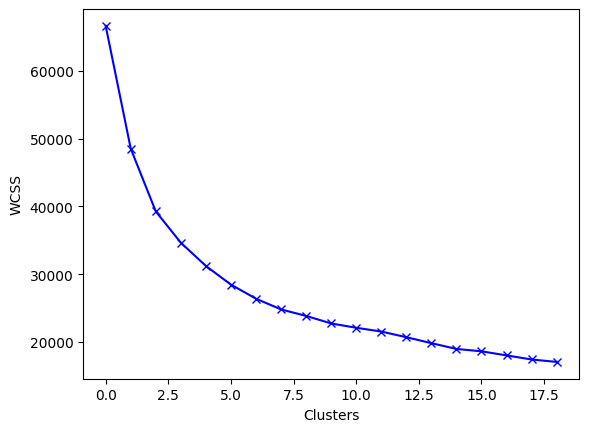

In [73]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

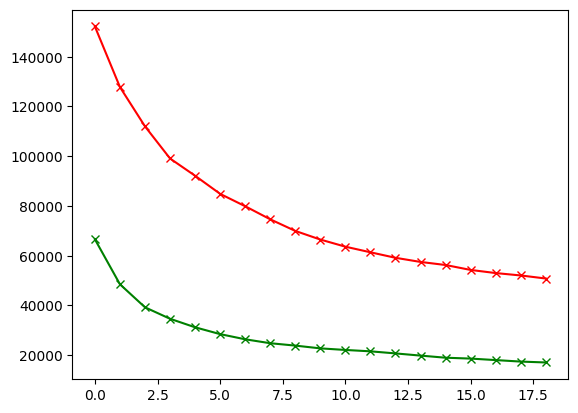

In [74]:
plt.plot(wcss_1, 'rx-')  # Vermelho
plt.plot(wcss_2, 'gx-')  # Verde

In [75]:
kmeans = KMeans(n_clusters=4, n_init=1)
kmeans.fit(compact)

KMeans(n_clusters=4, n_init=1)

In [76]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 3, 1, ..., 0, 0, 3]), (8950,))

In [77]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [79]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.333133,-0.066643
1,1.163196,1.528456
2,-1.410616,-0.680410
3,-0.745626,-0.174704
4,-1.448216,-0.201995


In [80]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.333133,-0.066643,1
1,1.163196,1.528456,3
2,-1.410616,-0.680410,1
3,-0.745626,-0.174704,1
4,-1.448216,-0.201995,1


<Axes: xlabel='pca1', ylabel='pca2'>

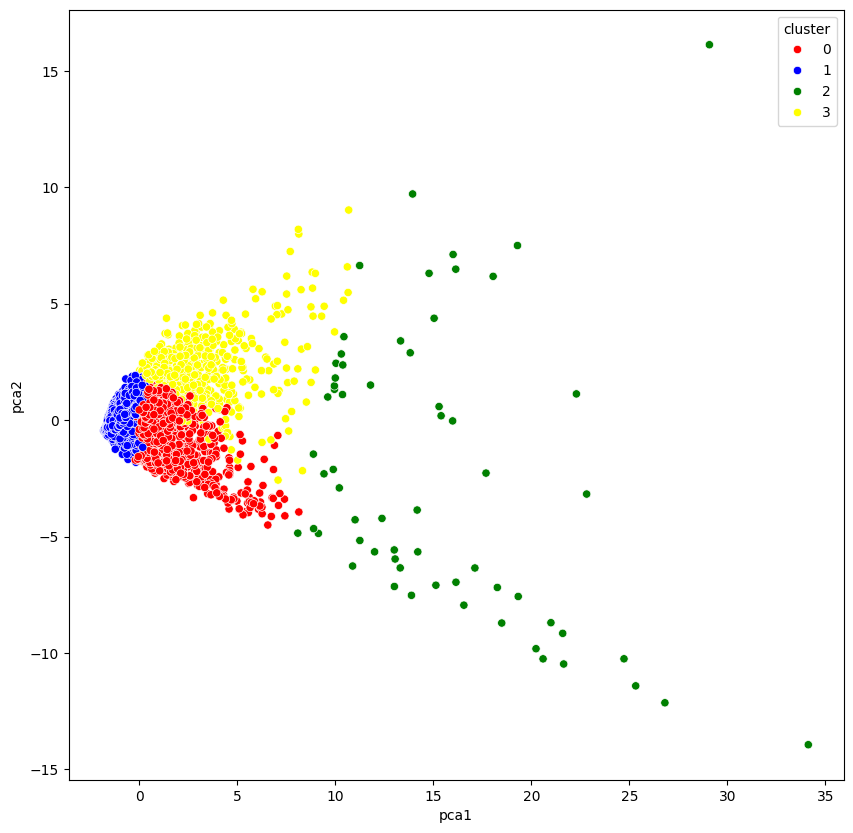

In [81]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette= ['red', 'blue', 'green', 'yellow'])

In [82]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6395,87.540559,1.000000,885.13,0.00,885.13,0.000000,1.000000,0.000000,1.000000,0.000000,0,21,6000.0,801.593051,186.251245,0.916667,12,0
1342,5161.854898,1.000000,4542.33,4051.67,490.66,0.000000,1.000000,1.000000,0.583333,0.000000,0,105,7500.0,3376.379090,1171.273248,0.000000,12,0
3269,5532.653003,1.000000,2491.83,1449.12,1042.71,3504.619697,0.916667,0.500000,0.750000,0.416667,16,37,10500.0,1683.540792,1437.443187,0.000000,12,0
1340,80.363442,0.909091,2370.44,47.50,2322.94,0.000000,1.000000,0.083333,1.000000,0.000000,0,63,1500.0,2373.359220,141.350236,0.818182,12,0
1339,162.905422,0.727273,1600.00,0.00,1600.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,6000.0,2733.152899,156.243291,0.666667,12,0


In [83]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2196,5926.837633,0.818182,0.00,0.00,0.0,9596.316702,0.000000,0.000000,0.0,0.181818,6,0,13000.0,1599.792795,2715.036678,0.0,11,3
2206,5432.113514,1.000000,793.10,793.10,0.0,6245.023709,0.583333,0.583333,0.0,0.500000,15,13,10000.0,1261.909483,1290.536388,0.0,12,3
7043,45.746204,0.833333,170.00,170.00,0.0,1042.121023,0.166667,0.166667,0.0,0.500000,3,1,1200.0,1327.700776,41.385496,0.5,6,3
7129,315.588502,0.272727,0.00,0.00,0.0,2966.464163,0.000000,0.000000,0.0,0.250000,5,0,3000.0,7842.362894,232.381936,0.5,12,3
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,3


In [91]:
df_cluster_ordered.to_excel('cluster_ordered.xlsx')